<a href="https://colab.research.google.com/github/Dennieeeee/COVID19-Pandemic/blob/master/COVID19_trim_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [38]:
file='https://raw.githubusercontent.com/Dennieeeee/COVID19-Pandemic/master/covid19_unemployment_2020'
df=pd.read_csv(file)

# Columns
- ALAND: Area of Land (square meters)
- AWATER: Area of Water (square meters)
- NAME: City Name
- State: State
- LaborForce_01Month: Count of people within the US labor force, 1 month prior to current
- Employed_01Month: Count of employed population, 1 month prior to current
- Unemployed_01Month: Count of unemployed population, 1 month prior to current
- PctUnemployed_01Month: Percent unemployed population, 1 month prior to current
- CurrentMonth: Month and year, most current month offered by BLS
- vulnerability_index: Vulnerability Index
- rank_cvi: Rank
- fips_cvi: Fips

In [39]:
df.head()

,ALAND,AWATER,NAME,State,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,CurrentMonth,vulnerability_index,rank_cvi,fips_cvi
0,1539602137,25706961,Autauga County,Alabama,25835.0,25114.0,721.0,2.8,April 2020 - Preliminary,110.31,401,1001
1,4117621645,1132980868,Baldwin County,Alabama,96391.0,93782.0,2609.0,2.7,April 2020 - Preliminary,146.88,91,1003
2,2292160139,50523213,Barbour County,Alabama,8537.0,8221.0,316.0,3.7,April 2020 - Preliminary,87.78,1455,1005
3,1612167476,9602089,Bibb County,Alabama,8617.0,8348.0,269.0,3.1,April 2020 - Preliminary,69.94,2398,1007
4,1670103866,15015467,Blount County,Alabama,25103.0,24421.0,682.0,2.7,April 2020 - Preliminary,92.04,1224,1009


In [40]:
#Create a new column
#Employed rate = Employed_01Month/LaborForce_01Month
df['percent_employed']=df['Employed_01Month']/df['LaborForce_01Month']


In [41]:
df1=df[['State','NAME','LaborForce_01Month','Employed_01Month','Unemployed_01Month','PctUnemployed_01Month','percent_employed']]

In [42]:
df1.describe()

,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,percent_employed
count,3.090000e+03,3.090000e+03,3090.000000,3090.000000,3090.000000
mean,5.180697e+04,4.945582e+04,2351.149838,4.819029,0.951817
std,1.691945e+05,1.605313e+05,9012.870859,2.053298,0.020529
min,2.080000e+02,1.900000e+02,6.000000,0.800000,0.764973
25%,4.857250e+03,4.603750e+03,227.000000,3.500000,0.943473
50%,1.155850e+04,1.102800e+04,539.500000,4.400000,0.955691
75%,3.129400e+04,3.002500e+04,1450.750000,5.675000,0.965192
max,4.996564e+06,4.669061e+06,327503.000000,23.500000,0.991561


In [43]:
# How many people lost their job on average?
x = abs(round((2351.149838-4.945582e+04)/4.945582e+04 * 100, 2))
print(f'{x}% employees in the US lost their jobs.')

95.25% employees in the US lost their jobs.


In [44]:
#Find out the average and median unemployment for each state
df1.groupby('State').agg(['mean','median']).head()

LaborForce_01Month           ... percent_employed          
                         mean   median  ...             mean    median
State                                   ...                           
Alabama          33240.402985  14553.0  ...         0.965245  0.968473
Alaska           12119.678571   2876.0  ...         0.909344  0.911053
Arizona         239230.133333  52093.0  ...         0.916547  0.925280
Arkansas         18373.653333   7960.0  ...         0.942321  0.945182
California      330898.568966  82591.0  ...         0.924069  0.933033

[5 rows x 10 columns]

In [45]:
df1.head(2)

,State,NAME,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,percent_employed
0,Alabama,Autauga County,25835.0,25114.0,721.0,2.8,0.972092
1,Alabama,Baldwin County,96391.0,93782.0,2609.0,2.7,0.972933


In [46]:
df1.shape

(3090, 7)

# Outliers
Unemployment

In [47]:
df1.head(1)

,State,NAME,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,percent_employed
0,Alabama,Autauga County,25835.0,25114.0,721.0,2.8,0.972092


Rejection 44 points
z-score of 3 corresponds to a prob of 0.27%


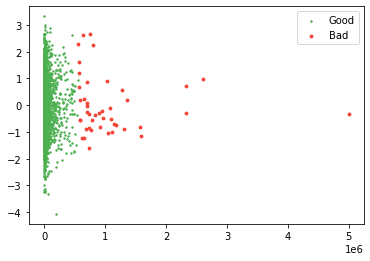

In [48]:

mean, std=np.mean(df1['LaborForce_01Month']), np.std(df1['LaborForce_01Month'])
z_score = np.abs((df1['LaborForce_01Month']-mean) / std)
threshold = 3
good = z_score < threshold

print(f"Rejection {(~good).sum()} points")
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
visual_scatter = np.random.normal(size=df1['LaborForce_01Month'].size)
plt.scatter(df1['LaborForce_01Month'][good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(df1['LaborForce_01Month'][~good], visual_scatter[~good], s=8, label="Bad", color="#F44336")
plt.legend()


In [49]:
df1['LaborForce_01Month'][~good]

102     2334396.0
185      835440.0
203     4996564.0
214     1587658.0
217     1098822.0
218      711060.0
220      964069.0
221     1575269.0
222      579275.0
227     1042736.0
323     1036395.0
344      756495.0
359     1317241.0
364      761283.0
366      733058.0
443      565140.0
605     2615106.0
1200     565509.0
1217     918161.0
1285     680858.0
1304     808989.0
1332     707798.0
1737    1143825.0
1818     583312.0
1839    1171517.0
1845     707360.0
1846     892124.0
1856    1113178.0
1867     777487.0
1937     616239.0
1969     593306.0
2048     589480.0
2055     695289.0
2233     647292.0
2281     736461.0
2524     944253.0
2552     563411.0
2566    1363851.0
2610    2321037.0
2729    1075094.0
2736     739887.0
2781     637855.0
2835     646716.0
2918    1282512.0
Name: LaborForce_01Month, dtype: float64

Rejection 45 points
z-score of 3 corresponds to a prob of 0.27%


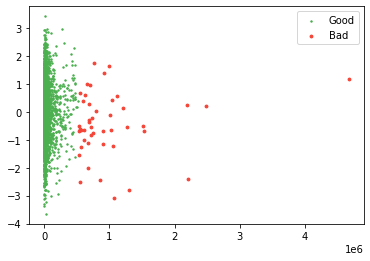

In [50]:

mean, std=np.mean(df1['Employed_01Month']), np.std(df1['Employed_01Month'])
z_score = np.abs((df1['Employed_01Month']-mean) / std)
threshold = 3
good = z_score < threshold

print(f"Rejection {(~good).sum()} points")
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
visual_scatter = np.random.normal(size=df1['Employed_01Month'].size)
plt.scatter(df1['Employed_01Month'][good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(df1['Employed_01Month'][~good], visual_scatter[~good], s=8, label="Bad", color="#F44336")
plt.legend()


Rejection 35 points
z-score of 3 corresponds to a prob of 0.27%


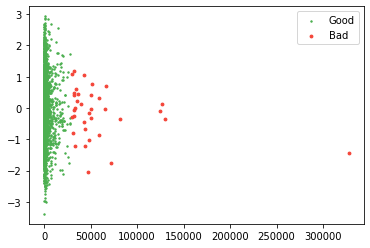

In [51]:

mean, std=np.mean(df1['Unemployed_01Month']), np.std(df1['Unemployed_01Month'])
z_score = np.abs((df1['Unemployed_01Month']-mean) / std)
threshold = 3
good = z_score < threshold

print(f"Rejection {(~good).sum()} points")
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
visual_scatter = np.random.normal(size=df1['Unemployed_01Month'].size)
plt.scatter(df1['Unemployed_01Month'][good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(df1['Unemployed_01Month'][~good], visual_scatter[~good], s=8, label="Bad", color="#F44336")
plt.legend()


Rejection 54 points
z-score of 3 corresponds to a prob of 0.27%


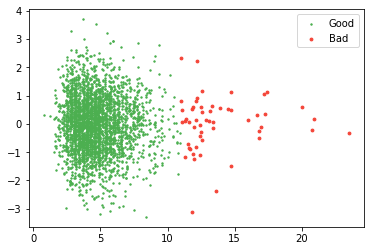

In [52]:
mean, std=np.mean(df1['PctUnemployed_01Month']), np.std(df1['PctUnemployed_01Month'])
z_score = np.abs((df1['PctUnemployed_01Month']-mean) / std)
threshold = 3
good = z_score < threshold

print(f"Rejection {(~good).sum()} points")
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
visual_scatter = np.random.normal(size=df1['PctUnemployed_01Month'].size)
plt.scatter(df1['PctUnemployed_01Month'][good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(df1['PctUnemployed_01Month'][~good], visual_scatter[~good], s=8, label="Bad", color="#F44336")
plt.legend()

Rejection 52 points
z-score of 3 corresponds to a prob of 0.27%


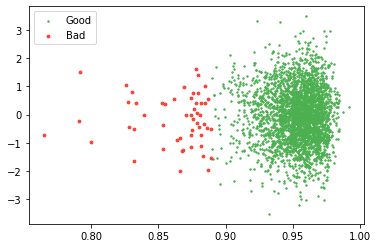

In [53]:
mean, std=np.mean(df1['percent_employed']), np.std(df1['percent_employed'])
z_score = np.abs((df1['percent_employed']-mean) / std)
threshold = 3
good = z_score < threshold

print(f"Rejection {(~good).sum()} points")
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
visual_scatter = np.random.normal(size=df1['percent_employed'].size)
plt.scatter(df1['percent_employed'][good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(df1['percent_employed'][~good], visual_scatter[~good], s=8, label="Bad", color="#F44336")
plt.legend()

In [54]:
df1.columns

Index(['State', 'NAME', 'LaborForce_01Month', 'Employed_01Month',
       'Unemployed_01Month', 'PctUnemployed_01Month', 'percent_employed'],
      dtype='object')

In [55]:
df1['LaborForce_01Month']= df1['LaborForce_01Month'][good]
df1['Employed_01Month']= df1['Employed_01Month'][good]
df1['Unemployed_01Month']= df1['Unemployed_01Month'][good]
df1['PctUnemployed_01Month']= df1['PctUnemployed_01Month'][good]
df1['percent_employed']=df1['percent_employed'][good]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State                  3090 non-null   object 
 1   NAME                   3090 non-null   object 
 2   LaborForce_01Month     3038 non-null   float64
 3   Employed_01Month       3038 non-null   float64
 4   Unemployed_01Month     3038 non-null   float64
 5   PctUnemployed_01Month  3038 non-null   float64
 6   percent_employed       3038 non-null   float64
dtypes: float64(5), object(2)
memory usage: 169.1+ KB


In [57]:
df1.tail()

,State,NAME,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,percent_employed
3085,Wyoming,Sweetwater County,21297.0,20097.0,1200.0,5.6,0.943654
3086,Wyoming,Teton County,14961.0,14527.0,434.0,2.9,0.970991
3087,Wyoming,Uinta County,9026.0,8589.0,437.0,4.8,0.951584
3088,Wyoming,Washakie County,3840.0,3638.0,202.0,5.3,0.947396
3089,Wyoming,Weston County,3816.0,3691.0,125.0,3.3,0.967243


In [58]:
print(df1[df1.isnull().any(axis=1)]['PctUnemployed_01Month'])

70     NaN
71     NaN
72     NaN
75     NaN
76     NaN
81     NaN
86     NaN
89     NaN
94     NaN
95     NaN
109    NaN
190    NaN
197    NaN
199    NaN
200    NaN
208    NaN
209    NaN
211    NaN
216    NaN
235    NaN
238    NaN
271    NaN
517    NaN
998    NaN
1033   NaN
1051   NaN
1062   NaN
1065   NaN
1123   NaN
1139   NaN
1159   NaN
1167   NaN
1238   NaN
1271   NaN
1422   NaN
1800   NaN
1925   NaN
2086   NaN
2671   NaN
2723   NaN
2754   NaN
2763   NaN
2772   NaN
2791   NaN
2911   NaN
2944   NaN
2947   NaN
2948   NaN
2964   NaN
2970   NaN
2984   NaN
2993   NaN
Name: PctUnemployed_01Month, dtype: float64


In [59]:
#Dropped the rows with NaN values in the PctUnemployed_01Month column
df1.dropna(subset=['PctUnemployed_01Month','LaborForce_01Month'],inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3038 entries, 0 to 3089
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State                  3038 non-null   object 
 1   NAME                   3038 non-null   object 
 2   LaborForce_01Month     3038 non-null   float64
 3   Employed_01Month       3038 non-null   float64
 4   Unemployed_01Month     3038 non-null   float64
 5   PctUnemployed_01Month  3038 non-null   float64
 6   percent_employed       3038 non-null   float64
dtypes: float64(5), object(2)
memory usage: 189.9+ KB


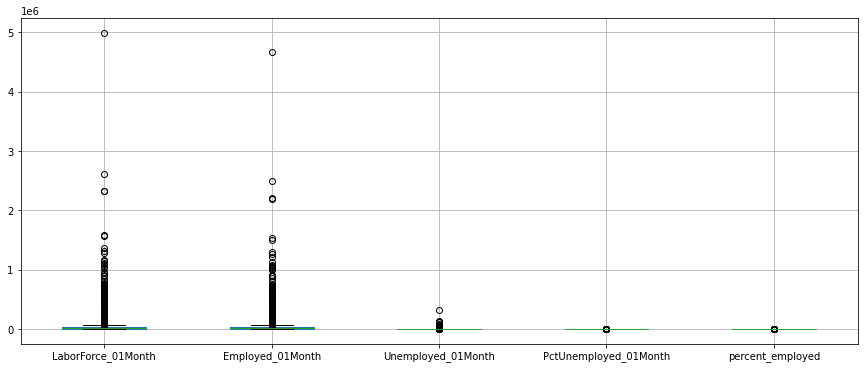

In [61]:
df1.boxplot(figsize=(15,6))

{'boxes': [<matplotlib.lines.Line2D at 0x7fb2324a5e10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb232942278>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb2324aa630>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb2324aac18>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb2324a5e48>,
  <matplotlib.lines.Line2D at 0x7fb232972518>]}

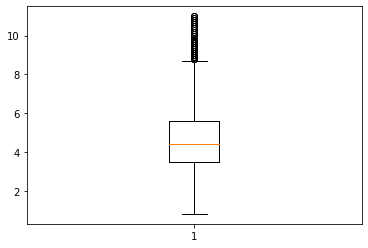

In [62]:
plt.boxplot(df1['PctUnemployed_01Month'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fb231ad95c0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb231a95be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb231adbd30>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb231adbac8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb231fc1c18>,
  <matplotlib.lines.Line2D at 0x7fb231fc1f98>]}

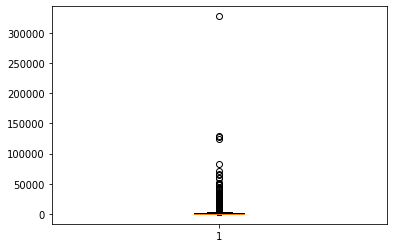

In [63]:
plt.boxplot(df1['Unemployed_01Month'])

# Trim Outliers (Recommended)
Remove outliers on df1_copy version

In [64]:
#Make a copy version of df1
df1_copy = df1.copy()

In [65]:
#Trim outliers:
starting_percentile = df1_copy['PctUnemployed_01Month'].quantile(.05)
ending_percentile = df1_copy['PctUnemployed_01Month'].quantile(.95)
price_outliers_df = df1_copy.loc[((df1_copy['PctUnemployed_01Month'] <= starting_percentile) | (df1_copy['PctUnemployed_01Month'] >= ending_percentile))]
df_trimmed = df1_copy.loc[((df1_copy['PctUnemployed_01Month'] > starting_percentile) & (df1_copy['PctUnemployed_01Month'] < ending_percentile))]

In [66]:
# Drop incomplete cases
df1_copy_filtered = df_trimmed.dropna()

In [67]:
df1_copy_filtered

,State,NAME,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,percent_employed
0,Alabama,Autauga County,25835.0,25114.0,721.0,2.8,0.972092
1,Alabama,Baldwin County,96391.0,93782.0,2609.0,2.7,0.972933
2,Alabama,Barbour County,8537.0,8221.0,316.0,3.7,0.962985
3,Alabama,Bibb County,8617.0,8348.0,269.0,3.1,0.968783
4,Alabama,Blount County,25103.0,24421.0,682.0,2.7,0.972832
...,...,...,...,...,...,...,...
3085,Wyoming,Sweetwater County,21297.0,20097.0,1200.0,5.6,0.943654
3086,Wyoming,Teton County,14961.0,14527.0,434.0,2.9,0.970991
3087,Wyoming,Uinta County,9026.0,8589.0,437.0,4.8,0.951584
3088,Wyoming,Washakie County,3840.0,3638.0,202.0,5.3,0.947396


In [68]:
print(df1.shape,df1_copy_filtered.shape)

(3038, 7) (2712, 7)


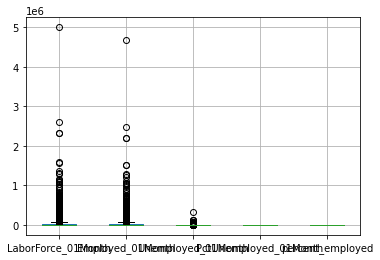

In [69]:
df1_copy_filtered.boxplot()

In [70]:
df1_copy_filtered.to_csv('COVID19_unemp_v2')